In [12]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy import stats
import os

x = pd.read_csv('gdrive/My Drive/clean_data.csv', usecols=["dateTime", "temp", "sal", "ftu","fluors","o2", "kd","par_0","par_1","par_2"], keep_default_na=False) 
y=pd.read_csv('gdrive/My Drive/clean_data.csv', usecols=["dateTime"], keep_default_na=False)
#y = pd.read_csv('gdrive/My Drive/clean_data.csv', usecols=["dateTime"], date_parser=["dateTime"])

#df = pd.read_csv('gdrive/My Drive/clean_data.csv', sep=';', dtype=dtypes)
#df["DateTime"] = df.apply(lambda row: pd.to_datetime(f'{row["Date"]} {row["Time"]}'), axis="columns")
#df.drop(['Date','Time'], axis=1, inplace=True)


y['dateTime'] = pd.to_datetime(y['dateTime'])
x['dateTime'] = pd.to_datetime(x['dateTime'])
y=y.squeeze()
x = x.set_index('dateTime')

x_temp=x.iloc[:,0]
x_sal=x.iloc[:,1]
x_ftu=x.iloc[:,2]
x_fluors=x.iloc[:,3]
x_02=x.iloc[:,4]
x_kd=x.iloc[:,5]
x_par_0=x.iloc[:,6]
x_par_1=x.iloc[:,7]
x_par_2=x.iloc[:,8]
x_temp= pd.to_numeric(x_temp, errors='coerce')
x_sal= pd.to_numeric(x_sal, errors='coerce')
x_ftu= pd.to_numeric(x_ftu, errors='coerce')
x_fluors= pd.to_numeric(x_fluors, errors='coerce')
x_02= pd.to_numeric(x_02, errors='coerce')
x_kd=pd.to_numeric(x_kd,errors='coerce')
x_par_0= pd.to_numeric(x_par_0, errors='coerce')
x_par_1= pd.to_numeric(x_par_1, errors='coerce')
x_par_2= pd.to_numeric(x_par_2, errors='coerce')



Mounted at /content/gdrive


In [13]:
x_temp.tail(20)

dateTime
2019-12-06 15:00:00   NaN
2019-12-06 15:30:00   NaN
2019-12-06 16:00:00   NaN
2019-12-07 07:30:00   NaN
2019-12-07 08:00:00   NaN
2019-12-07 08:30:00   NaN
2019-12-07 09:00:00   NaN
2019-12-07 09:30:00   NaN
2019-12-07 10:00:00   NaN
2019-12-07 10:30:00   NaN
2019-12-07 11:00:00   NaN
2019-12-07 11:30:00   NaN
2019-12-07 12:00:00   NaN
2019-12-07 12:30:00   NaN
2019-12-07 13:00:00   NaN
2019-12-07 13:30:00   NaN
2019-12-07 14:00:00   NaN
2019-12-07 14:30:00   NaN
2019-12-07 15:00:00   NaN
2019-12-07 15:30:00   NaN
Name: temp, dtype: float64

In [4]:

window = 96 #number of data points in a day
average_data_x = []
for ind in range(len(x_temp) - window + 1):
  average_data_x.append(np.mean(x_temp[ind:ind+window]))
  
for ind in range(window - 1):
  average_data_x.insert(0, np.nan)

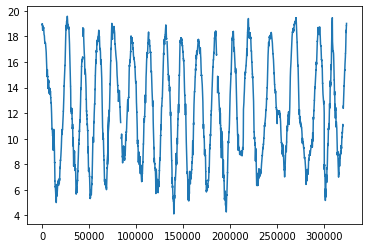

In [5]:
plt.plot(average_data_x)
plt.show()

In [6]:
f_x_temp_2 = x_temp.interpolate(method="polynomial", order=2)

ValueError: ignored

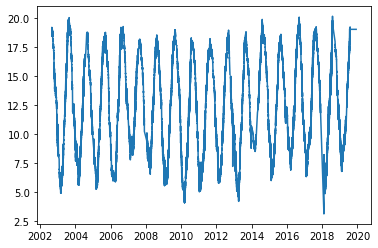

In [45]:
plt.plot(y,f_x_temp_2)
plt.show()


In [26]:
x.iloc[:,0]=f_x_temp_2


,temp,sal,ftu,fluors,o2,kd,par_0,par_1,par_2
dateTime,,,,,,,,,
2002-08-28 13:15:00,18.78,34.691,6.42,0.62,,0.641,,429.3,226.2
2002-08-28 13:30:00,18.77,34.666,6.56,0.63,,0.688,,475.9,239.1
2002-08-28 13:45:00,18.75,34.653,5.69,0.66,,0.682,,518.9,262.4
2002-08-28 14:00:00,18.75,34.635,5.5,0.69,,0.72,,603.9,294.0
2002-08-28 14:15:00,18.74,34.628,4.93,0.75,,,,570.9,292.7
...,...,...,...,...,...,...,...,...,...
2019-12-07 13:30:00,NaN,,,,,0.452,,,
2019-12-07 14:00:00,NaN,,,,,0.429,,,
2019-12-07 14:30:00,NaN,,,,,0.422,,,


In [46]:
f_x_temp_2.tail(50)


dateTime
2019-12-05 08:30:00    19.018
2019-12-05 09:00:00    19.018
2019-12-05 09:30:00    19.018
2019-12-05 10:00:00    19.018
2019-12-05 10:30:00    19.018
2019-12-05 11:00:00    19.018
2019-12-05 11:30:00    19.018
2019-12-05 12:00:00    19.018
2019-12-05 12:30:00    19.018
2019-12-05 13:00:00    19.018
2019-12-05 13:30:00    19.018
2019-12-05 14:00:00    19.018
2019-12-05 14:30:00    19.018
2019-12-05 15:00:00    19.018
2019-12-05 15:30:00    19.018
2019-12-06 07:30:00    19.018
2019-12-06 08:00:00    19.018
2019-12-06 08:30:00    19.018
2019-12-06 09:00:00    19.018
2019-12-06 09:30:00    19.018
2019-12-06 10:00:00    19.018
2019-12-06 10:30:00    19.018
2019-12-06 11:00:00    19.018
2019-12-06 11:30:00    19.018
2019-12-06 12:00:00    19.018
2019-12-06 12:30:00    19.018
2019-12-06 13:00:00    19.018
2019-12-06 13:30:00    19.018
2019-12-06 14:00:00    19.018
2019-12-06 14:30:00       NaN
2019-12-06 15:00:00       NaN
2019-12-06 15:30:00       NaN
2019-12-06 16:00:00       NaN
2

In [ ]:
f_x_temp_2.to_csv('clean_data.csv', sep = ',', index = 'False')

In [8]:
window = 96 #number of data points in a day
av_temp_x = []
for ind in range(len(f_x_temp_2) - window + 1):
  av_temp_x.append(np.mean(f_x_temp_2[ind:ind+window]))

for ind in range(window - 1):
  av_temp_x.insert(0, np.nan)

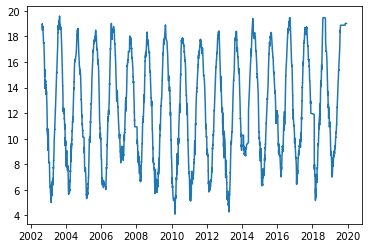

In [9]:
plt.plot(y,av_temp_x)
plt.show()

In [10]:
len(y)

324479

In [11]:
window = 96
average_data_2 = []
for ind in range(len(f_x_temp_2) - window + 1):
  average_data_2.append(np.mean(f_x_temp_2[ind:ind+window]))

for ind in range(window - 1):
  average_data_2.insert(0, np.nan)

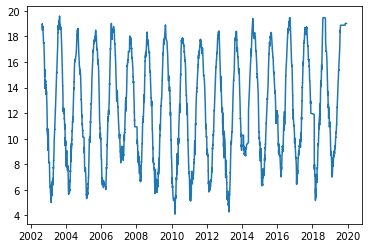

In [12]:
plt.plot(y,average_data_2)
plt.show()

In [13]:
len(f_x_temp_2)
len(y)

324479

In [14]:
len(average_data_2)

324479

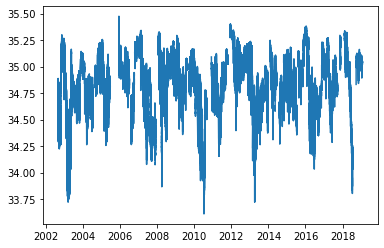

In [15]:
plt.plot(y,x_sal)
plt.show()

In [16]:
f_x_sal = x_sal.interpolate(method="linear", limit=3800, limit_direction='both')

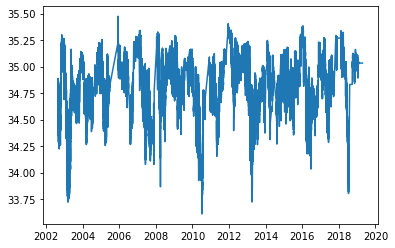

In [17]:
plt.plot(y,f_x_sal)
plt.show()

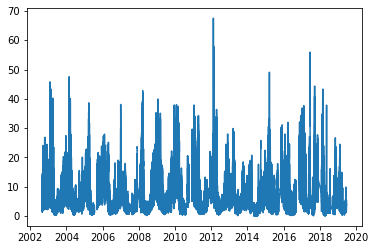

In [18]:
plt.plot(y,x_ftu)
plt.show()

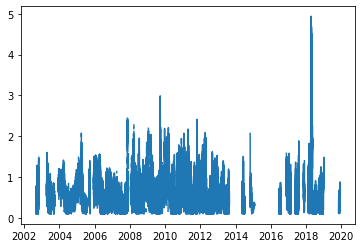

In [19]:
plt.plot(y,x_kd)
plt.show()

In [20]:
max(x_kd)

4.939

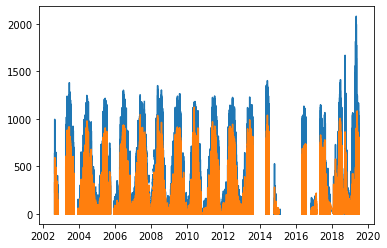

In [22]:
plt.plot(y,x_par_1,y,x_par_2)
plt.show()

In [ ]:
fig, ax = plt.subplots(3,1)
ax[0].plot(x_ftu)
ax[1].plot(x_02)
ax[2].plot(x_kd)
fig.show()


In [ ]:
plt.plot(y,x_02)
plt.show()

In [23]:
window = 672
kd_month_avg = []
temp_month_avg=[]
for ind in range(len(x_kd) - window + 1):
  kd_month_avg.append(np.mean(x_kd[ind:ind+window]))
  temp_month_avg.append(np.mean(x_temp[ind:ind+window]))

kd_month_avg=pd.Series(kd_month_avg)
temp_month_avg=pd.Series(temp_month_avg)

bothy=kd_month_avg['Kd'].map(int)+temp_month_avg['Temp'].map(int)
import seaborn as sns

sns.pairplot(bothy)

#plt.plot(kd_month_avg)

#plt.show()


KeyboardInterrupt: ignored

In [ ]:
new_kd=kd_month_avg.interpolate(method="pad", limit=800)
plt.plot(new_kd)
plt.show()

In [ ]:
new_kd_2=x_kd.interpolate(method="linear", limit=2000)
plt.plot(new_kd_2)
plt.show()

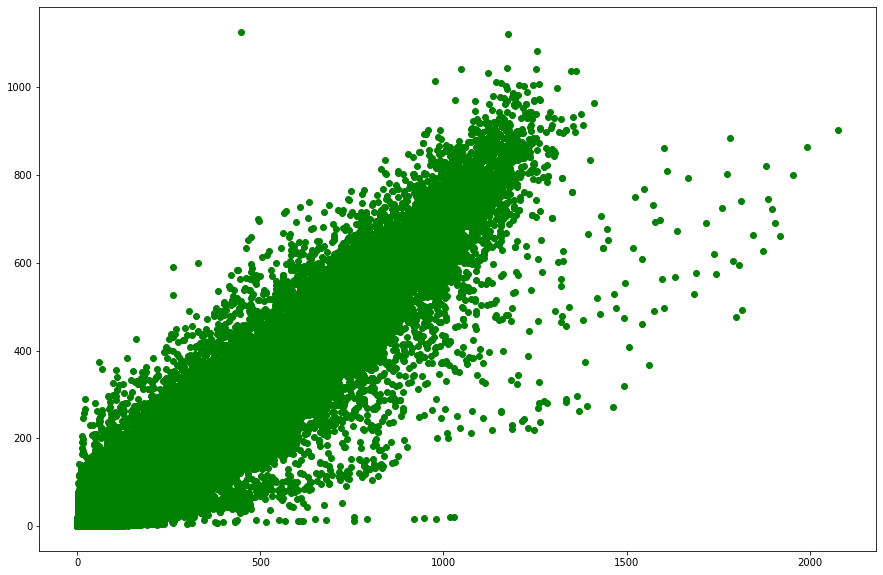

In [47]:

slope, intercept, r, p, std_err = stats.linregress(x_par_1, x_par_2)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x_par_1))

fig = plt.figure(figsize=(15, 10))
plt.plot(x_par_1, mymodel ,color='r')
plt.scatter(x_par_1, x_par_2,color='g')

plt.show()


In [ ]:

 
#Changing the current working directory
x_1 = x.copy()
 
categorical_col_updated = ['temp','sal','ftu',"fluors","o2", "kd","par_0","par_1","par_2"]
x_1 = pd.get_dummies(x_1, columns = categorical_col_updated) 
 
#Separating the dependent and independent data variables into two data frames.
from sklearn.model_selection import train_test_split 
 
X = x_1.drop(['cnt'],axis=1) 
Y = x_1['cnt']
 
# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test) #Predictions on Testing data
print(DT_predict)